In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py


initialize centoids
1 . randomly selecting from min to max
2 . select data points from dataset N-clusters
    2.1  top N cluster
    2.2  bottom N cluster
    2.3  Random N selection from dataset


In [10]:
df1 = pd.read_excel("/Users/krish_mamtora/Desktop/Sem5/ML-Practicle/MachineLearningPracticle/Machine-learning/Kmeans/kmean.xlsx")
df1


,1.842080,4.607572
0,5.658583,4.799964
1,6.352579,3.290854
2,2.904017,4.612204
3,3.231979,4.939894
4,1.247923,4.932678
...,...,...
294,7.302787,3.380160
295,6.991984,2.987067
296,4.825534,2.779617
297,6.117681,2.854757


In [11]:
import random
init_centroid = random.sample(range(0,len(df1)),3)
init_centroid

[176, 49, 153]

In [12]:
centroids=[]
for i in init_centroid:
  centroids.append(df1.iloc[i])

In [13]:
centroids

[1.842080    3.540102
 4.607572    0.864461
 Name: 176, dtype: float64,
 1.842080    1.817333
 4.607572    5.133339
 Name: 49, dtype: float64,
 1.842080    1.654563
 4.607572    1.186312
 Name: 153, dtype: float64]

In [14]:
centroids = np.array(centroids)
centroids

array([[3.54010186, 0.86446135],
       [1.8173328 , 5.13333907],
       [1.65456309, 1.18631175]])

In [15]:
X=np.array(df1)

In [16]:
def calc_distance(i,j):
  return (sum((i-j)**2)**0.5)

In [17]:
def findnearcentroid(centroid,X):
  assignedcluster = []
  for i in X:
    dist=[]
    for j in centroid:
      dist.append(calc_distance(i,j))
    assignedcluster.append(np.argmin(dist))
  return assignedcluster



In [18]:
get_centroid = findnearcentroid(centroids,X)
get_centroid

[np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.in

In [19]:
def calculating_centroid(cluster_number,X):
  new_centroid = []
  new_df = pd.concat([pd.DataFrame(X),pd.DataFrame(get_centroid,columns=['cluster'])],axis=1)
  for c in set(new_df['cluster']):
    current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
    cluster_mean = current_cluster.mean(axis=0)
    new_centroid.append(cluster_mean)
  return new_centroid


In [20]:
# pd.concat([pd.DataFrame(X),pd.DataFrame(get_centroid,columns=['cluster'])],axis=1)

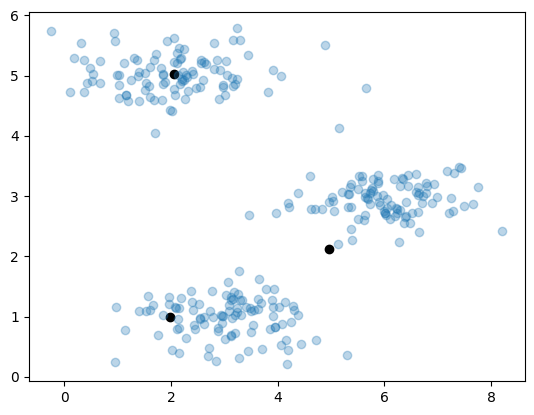

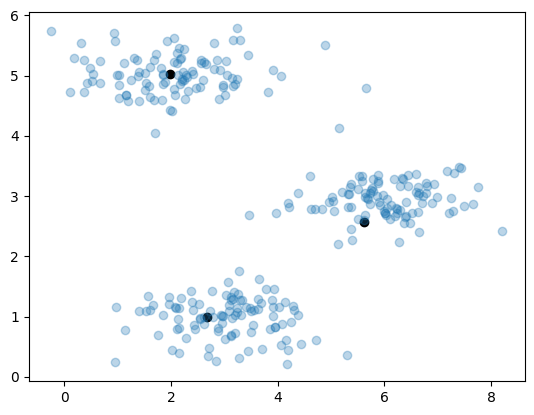

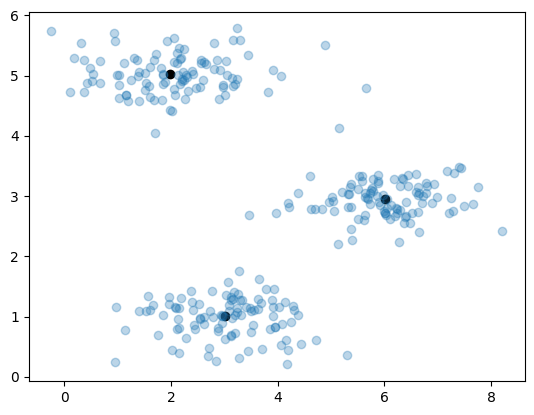

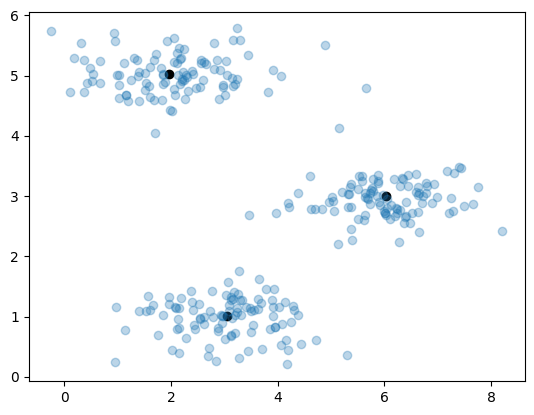

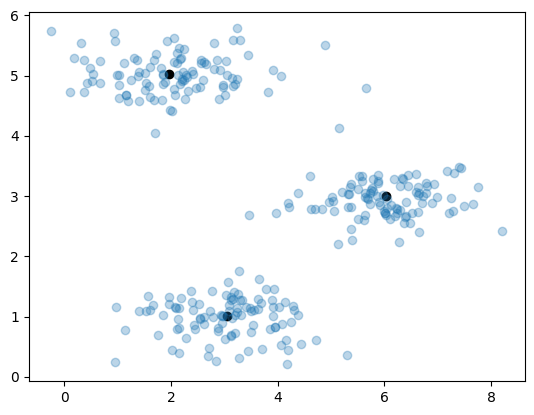

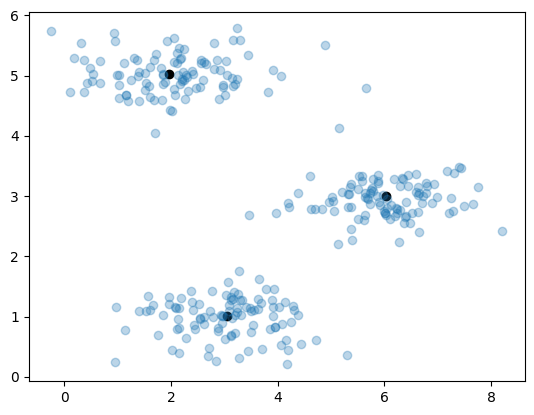

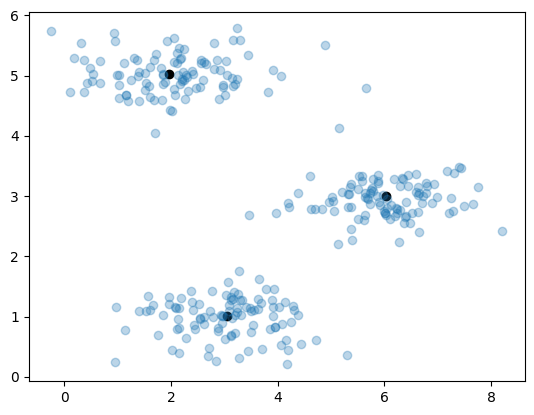

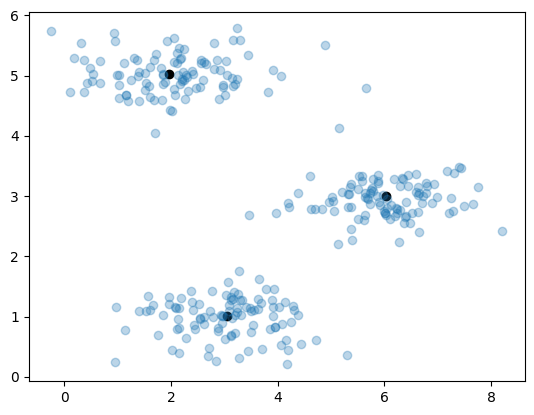

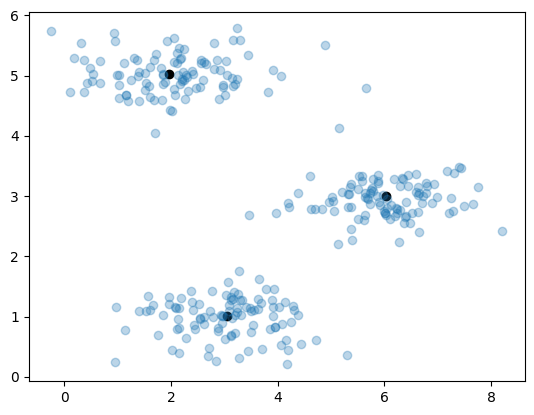

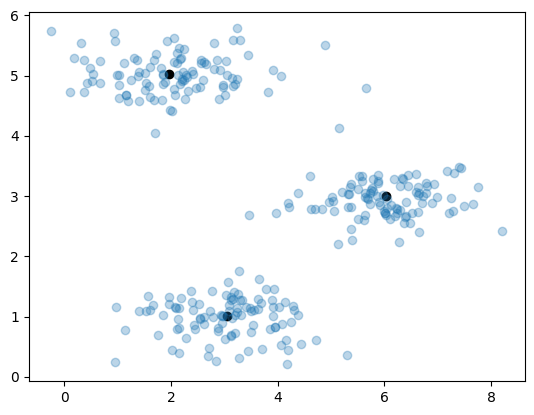

In [21]:
apoches = 10
for i in range(apoches):
  get_centroid = findnearcentroid(centroids,X)
  centroids = calculating_centroid(get_centroid,X)
  py.figure()
  py.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black', label='Centroids')  # Plot centroids
  py.scatter(X[:,0],X[:,1],alpha=0.3) #plotting observatoin points

